## Ähnlichkeiten berechnen
Ähnlichkeit zwischen zwei Personen anhand ihrer Fragebogen-Antworten numerisch ausdrücken 

survey_similarity(person1, person2) 

Idee: Nur nummerische Werte benutzen, alle Fragen die mit 1-5 bewertet werden konnten, sowie das Alter, Geschlecht und Studiengang

Die Informationen der vorherigen Clusteranalyse wurden mit in den Graphen übernommen, damit diese besser verglichen werden können.

In [517]:
import numpy as np 
import pandas as pd  
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

In [518]:
filename = "./data/survery_data_annonymized_230626_clean.csv"
filename_cluster = "./data/survey_data_annonymized_230626_clean_clusters.csv"

data = pd.read_csv(filename)
data_cluster = pd.read_csv(filename_cluster)

In [519]:
#unwichtig, sagt nicht viel aus 
col_remove = ["Position_num",
              "Basketball",
              "Fußball",
              "Handball",
              "Football",
              "Hockey",
              "Volleyball",
              "Tennis",
              "Yoga",
              "Kampfsport",
              "Tanzen",
              "Leichtathletik",
              "Bouldern/Klettern",
              "Schwimmen",
              "Wassersport",
              "Reiten",
              "Wintersport",
              "Rennrad/Mountainbike"]

In [520]:
data

,Alter,Geschlecht,Pseudonym,Position,Studiengang,Sportlichkeit,Sportarten,Fav_Sportart,Gesunde_Ernaehrung,Essen_gehen,...,Yoga,Kampfsport,Tanzen,Leichtathletik,Bouldern/Klettern,Schwimmen,Wassersport,Reiten,Wintersport,Rennrad/Mountainbike
0,28,männlich,lalala-lololo,Student*in,MMI,4,Basketball;Yoga;Bouldern/Klettern;Rennrad/Moun...,Joggen/Laufen,4,3,...,1,0,0,0,1,0,0,0,0,1
1,26,männlich,hbstr,Student*in,MMI,3,Fußball;Volleyball;Yoga;Bouldern/Klettern;Renn...,Fußball,4,4,...,1,0,0,0,1,0,0,0,0,1
2,24,männlich,Panda,Student*in,MMI,2,Fußball;Handball;Yoga;Tanzen;Bouldern/Klettern,Keine Angabe,5,4,...,1,0,1,0,1,0,0,0,0,0
3,23,männlich,TomTom Navigation,Student*in,MMI,5,Leichtathletik;Bouldern/Klettern;Wintersport,Trampolin,2,4,...,0,0,0,1,1,0,0,0,1,0
4,24,weiblich,LcAbrgr,Student*in,MMI,3,Bouldern/Klettern,Bouldern/Klettern,4,3,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,26,männlich,Stempelliebhaber,Student*in,MMI,1,Hockey,Keine Angabe,4,4,...,0,0,0,0,0,0,0,0,0,0
58,22,männlich,Fel,Student*in,BMT,3,Fußball,Fußball,3,4,...,0,0,0,0,0,0,0,0,0,0
59,25,weiblich,PaBe28,Student*in,BMT,3,Basketball;Yoga;Schwimmen,Rudern,3,4,...,1,0,0,0,0,1,0,0,0,0
60,31,weiblich,oretani,Student*in,BMI,3,Tennis;Yoga;Kampfsport;Tanzen;Schwimmen,Padel-Tennis,4,5,...,1,1,1,0,0,1,0,0,0,0


In [521]:
data_numerical = data.copy().select_dtypes(include='number')

data_numerical = data_numerical.drop(col_remove, axis=1)

In [522]:
data_numerical

,Alter,Sportlichkeit,Gesunde_Ernaehrung,Essen_gehen,Kochen,Feiern,Musik,Lesen,Darstellende_Kunst,Filme,...,Prokrastination,Abgaben_spaet,Neugier_Lebensmittel,Natur,Verreisen,Handwerk,Sprachnachrichten,Wichtigkeit_Geld,Geschlecht_num,Studiengang_num
0,28,4,4,3,4,3,5,4,3,3,...,3,2,5,5,2,2,3,3,1,3
1,26,3,4,4,5,2,4,2,3,4,...,2,2,4,3,3,4,3,4,1,3
2,24,2,5,4,4,3,5,2,3,4,...,5,1,3,2,3,2,4,3,1,3
3,23,5,2,4,4,2,3,3,2,4,...,2,3,5,4,4,2,3,3,1,3
4,24,3,4,3,2,1,3,4,2,5,...,5,5,2,3,4,3,3,4,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,26,1,4,4,5,2,5,3,4,5,...,2,1,4,3,2,3,1,3,1,3
58,22,3,3,4,4,3,4,1,1,2,...,4,3,4,3,4,4,1,5,1,2
59,25,3,3,4,3,2,4,4,3,3,...,4,4,4,5,3,4,2,2,0,2
60,31,3,4,5,5,3,5,4,4,5,...,3,2,5,4,4,3,2,3,0,0


In [523]:
#Da war das Alter miteinbeziehen, haben wir uns dafür entschieden, die Daten zu skalieren
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
standardized_data = standard_scaler.fit_transform(data_numerical)
print("Standardized Data:")
print(standardized_data)

Standardized Data:
[[ 0.55507333  0.72889252  0.55296675 ... -0.37563852  0.63960215
   1.06493344]
 [ 0.10520998 -0.2981833   0.55296675 ...  0.63695227  0.63960215
   1.06493344]
 [-0.34465337 -1.32525912  1.77739314 ... -0.37563852  0.63960215
   1.06493344]
 ...
 [-0.1197217  -0.2981833  -0.67145963 ... -1.3882293  -1.56347192
   0.13499156]
 [ 1.22986836 -0.2981833   0.55296675 ... -0.37563852 -1.56347192
  -1.7248922 ]
 [-0.1197217  -1.32525912 -1.89588601 ... -2.40082008  0.63960215
   0.13499156]]


In [524]:
data_numerical = standardized_data

In [525]:
#Testen von Möglichkeiten, zwei Teilnehmer zu vergleichen
import numpy as np

data_array1 = data_numerical[0] 
data_array2 = data_numerical[1]

data_array1, data_array2

(array([ 0.55507333,  0.72889252,  0.55296675, -0.87119691,  0.18179956,
         0.15329615,  1.07151675,  0.72740887,  0.31412676, -0.8272525 ,
        -0.03793823, -0.82487618, -0.99179754, -0.55101405, -0.15897488,
        -0.80339695, -0.85228648,  0.07900758, -0.49562147,  0.07202824,
         0.09723056, -0.3633131 ,  1.54616461,  0.21657404,  0.49466164,
         1.48362952, -0.5875097 , -0.46883903,  0.26552513, -1.30432632,
         1.65227338, -0.62196632, -1.2282795 ,  1.04178493,  2.05039174,
        -1.        , -0.94527391,  0.28788316, -0.37563852,  0.63960215,
         1.06493344]),
 array([ 0.10520998, -0.2981833 ,  0.55296675,  0.1479391 ,  1.20648797,
        -0.71073668,  0.        , -0.91256749,  0.31412676,  0.28774   ,
         0.74611848,  0.9386522 ,  0.45506005,  1.2470318 ,  0.93618538,
         0.82973783,  0.90910558,  0.07900758,  0.35794884,  0.07202824,
         0.09723056, -0.3633131 , -1.27331203,  0.21657404, -1.6204433 ,
         0.22356061, -0.5875

In [526]:
from numpy.linalg import norm

cos_sim = np.dot(data_array1, data_array2)/(norm(data_array1)*norm(data_array2))

In [527]:
cos_sim

-0.1631066785124496

In [528]:
from numpy.linalg import norm

def survey_similarity(person1, person2):
    cos_sim = np.dot(person1, person2)/(norm(person1)*norm(person2))
    print(cos_sim)

#survey_similarity(data_numerical.iloc[0].to_numpy(),data_numerical.iloc[10].to_numpy())
survey_similarity(data_numerical[0],data_numerical[1])

-0.1631066785124496


In [529]:
#Ähnlichkeiten für alle Teilnehmer berechnen
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(data_numerical)

In [560]:
cosine_sim[0]

array([ 1.        , -0.16310668,  0.03621403,  0.11584175, -0.05160534,
        0.10553513, -0.109296  ,  0.28338398, -0.05586882, -0.21244621,
       -0.16816385, -0.3043015 , -0.03165357,  0.06884601, -0.23681986,
       -0.05621493, -0.29850015, -0.22158591, -0.09235241,  0.10935025,
        0.22620495, -0.05400742, -0.11703423, -0.05974972, -0.08851664,
        0.30213054,  0.25540527,  0.11755565,  0.04245382, -0.02462662,
       -0.07716664,  0.19794937, -0.02179516, -0.07717679, -0.17453913,
        0.01912034, -0.02266451, -0.18568241, -0.04495182, -0.09545416,
        0.03054227,  0.16928754, -0.02821897, -0.06014098, -0.00150984,
       -0.47986102,  0.07168743,  0.02595917, -0.06048371,  0.02901755,
        0.0455284 ,  0.34115195, -0.1512058 , -0.24435174,  0.08578456,
        0.08207965,  0.25643026,  0.12307145,  0.11882123,  0.09557262,
       -0.05814456, -0.05096331])

## Grenzwert
0.3 mit einer der höchsten Werte, als Grenzwert aber zu hoch, da unserer Ansicht zu viel aussortiert wurde und der Graph so zu zerstückelt aussah. Daher haben wir uns für den Grenzwert 0.25 entschieden.

In [561]:
 grenzwert = 0.25

In [532]:
import networkx as nx

G = nx.Graph()

In [533]:
length = len(cosine_sim)
length

62

In [534]:
#Ähnlichkeiten aller Teilnehmer untereinander berechnen
for p in range(cosine_sim.shape[0]):
    for i in cosine_sim[p]:
        if (i > grenzwert) and (i < 1):
            test = np.where(cosine_sim[p] == i)
            test = test[0][0]
            if(data.loc[p].Pseudonym != data.loc[test].Pseudonym):
                G.add_edge(data.loc[p].Pseudonym, data.loc[test].Pseudonym, weight=i)
                print(data.loc[p].Pseudonym, data.loc[test].Pseudonym)
        else:
            G.add_node(data.loc[p].Pseudonym, cluster=data_cluster.iloc[p]["cluster_3"])
            

lalala-lololo air-oughtest-wood-abate
lalala-lololo nomercy
lalala-lololo agalper
lalala-lololo TV
lalala-lololo JustTill
hbstr Quantum342 (ChatGPT)
hbstr bangnon123
hbstr 7bpf8
hbstr DRP
hbstr Stempelliebhaber
Panda Heartist
Panda aw17
Panda Stempelliebhaber
TomTom Navigation 242
TomTom Navigation FB42
TomTom Navigation Moin123
TomTom Navigation hmmh
LcAbrgr nomercy
242 TomTom Navigation
242 7bpf8
242 ac1306
242 Moin123
242 TV
3186 one_more_datapoint
3186 KaHo
3186 S.R.R.
3186 Stempelliebhaber
air-oughtest-wood-abate lalala-lololo
air-oughtest-wood-abate Heartist
air-oughtest-wood-abate agalper
air-oughtest-wood-abate ac1306
one_more_datapoint 3186
one_more_datapoint Quantum342 (ChatGPT)
one_more_datapoint 123
one_more_datapoint kevkev
one_more_datapoint Ysaja
one_more_datapoint asdf
one_more_datapoint oretani
Quantum342 (ChatGPT) hbstr
Quantum342 (ChatGPT) one_more_datapoint
Quantum342 (ChatGPT) 123
Quantum342 (ChatGPT) mava
Quantum342 (ChatGPT) oretani
2111 AOoOA
2111 5714
2111 Tobb

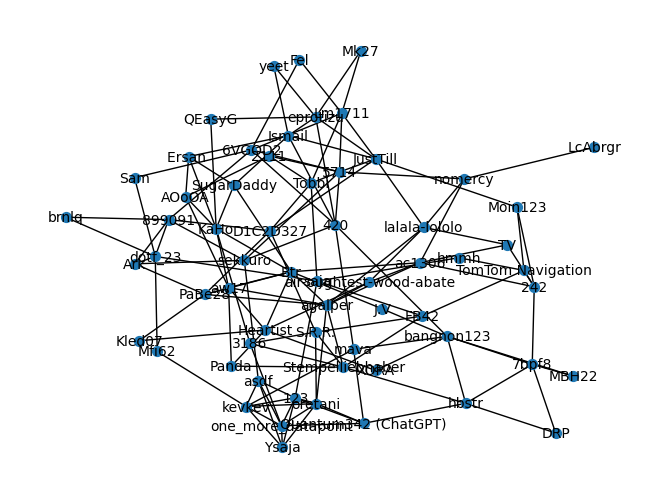

In [535]:
nx.draw(G,
        with_labels=True,
        font_size=10,
        node_size=50)

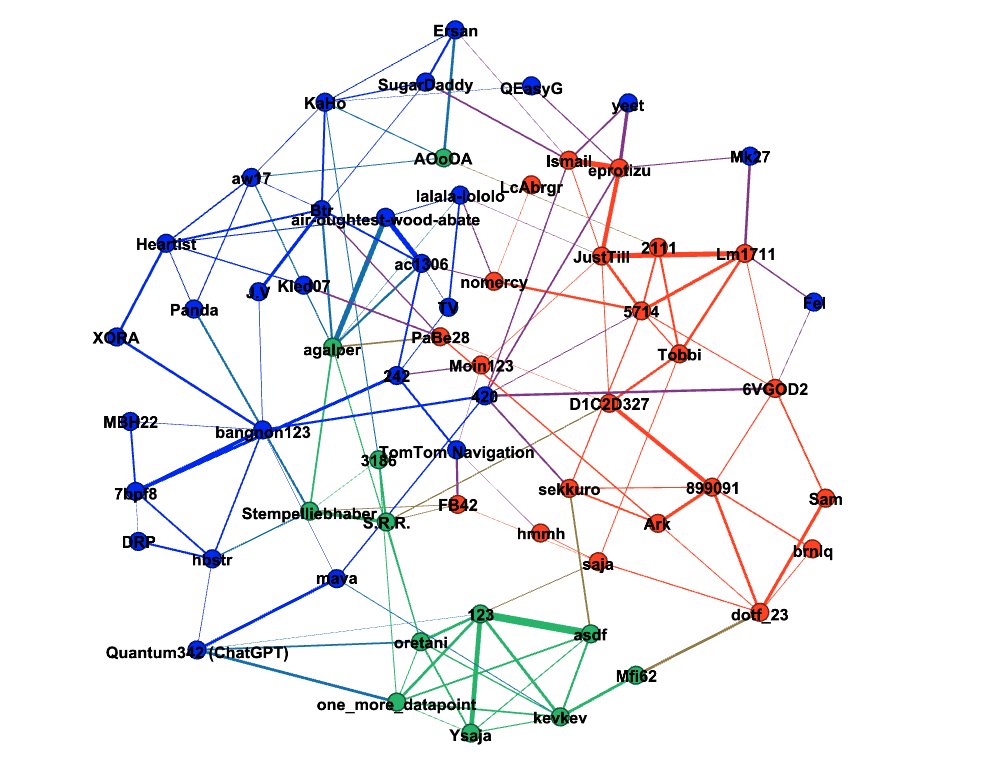

In [536]:
#Gephi importiert und mit hilfe der Cluster-Informationen aus der vorherigen Clusteranalyse eingefärbt
from IPython.display import Image

# Path to your image file
image_path = './data/images/cluster_neu.png'

# Display the image
Image(filename=image_path)

In [537]:
G.number_of_nodes()

62

In [538]:
G.number_of_edges()

142

In [539]:
G.degree()

DegreeView({'lalala-lololo': 5, 'air-oughtest-wood-abate': 4, 'nomercy': 4, 'agalper': 8, 'TV': 3, 'JustTill': 7, 'hbstr': 5, 'Quantum342 (ChatGPT)': 5, 'bangnon123': 7, '7bpf8': 5, 'DRP': 2, 'Stempelliebhaber': 6, 'Panda': 3, 'Heartist': 6, 'aw17': 6, 'TomTom Navigation': 4, '242': 5, 'FB42': 4, 'Moin123': 3, 'hmmh': 2, 'LcAbrgr': 1, 'ac1306': 6, '3186': 4, 'one_more_datapoint': 7, 'KaHo': 7, 'S.R.R.': 5, '123': 7, 'kevkev': 7, 'Ysaja': 5, 'asdf': 5, 'oretani': 7, 'mava': 4, '2111': 3, 'AOoOA': 4, '5714': 8, 'Tobbi': 5, 'Ismail': 6, 'eprotizu': 6, '420': 7, 'yeet': 2, 'Ersan ': 4, 'SugarDaddy': 4, 'MBH22': 2, 'XORA': 2, 'J.V': 2, 'QEasyG': 2, 'Mk27': 2, 'sekkuro': 5, '899091': 6, 'Ark': 4, '6VGOD2': 6, 'saja': 5, 'Btr': 8, 'Kled07': 2, 'dotf_23': 6, 'brnlq': 2, 'Sam': 2, 'Mfi62': 2, 'Lm1711': 6, 'PaBe28': 5, 'Fel': 2, 'D1C2D327': 5})

In [540]:
nx.density(G)

0.0750925436277102

In [541]:
centrality_betweenness = nx.betweenness_centrality(G)

In [542]:
pd.DataFrame(centrality_betweenness.items()).sort_values(by=[1], ascending=False)

,0,1
38,420,0.135623
8,bangnon123,0.106655
3,agalper,0.103780
5,JustTill,0.098367
34,5714,0.090622
...,...,...
39,yeet,0.000000
10,DRP,0.000000
42,MBH22,0.000000
60,Fel,0.000000


In [543]:
edge_betweenness = nx.edge_betweenness_centrality(G)

In [544]:
pd.DataFrame(edge_betweenness.items()).sort_values(by=[1], ascending=False)

,0,1
34,"(bangnon123, 420)",0.075251
16,"(agalper, oretani)",0.059666
9,"(nomercy, 5714)",0.044566
117,"(420, 6VGOD2)",0.040699
4,"(lalala-lololo, JustTill)",0.039565
...,...,...
87,"(kevkev, Ysaja)",0.005685
83,"(123, Ysaja)",0.004999
107,"(Ismail, eprotizu)",0.004880
71,"(one_more_datapoint, Ysaja)",0.004142


In [545]:
partitions = nx.community.girvan_newman(G)
partitions

<generator object girvan_newman at 0x7f9eb0a8ecf0>

0.5590250522768665


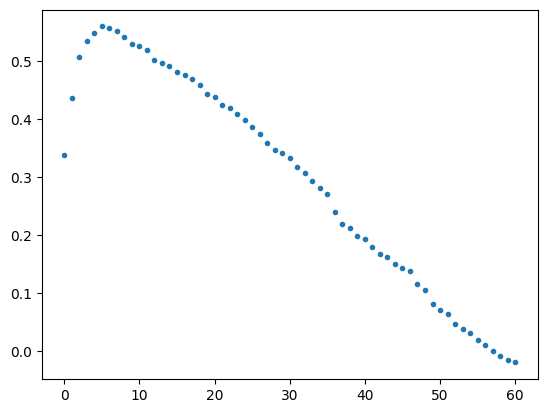

In [563]:
partitions = nx.community.girvan_newman(G)
best_modularity = -1
modularities = []
for partition in partitions:
    modularity = nx.community.quality.modularity(G, partition)
    if modularity > best_modularity:
        best_modularity = modularity
        best_partition = partition
    modularities.append(modularity)


plt.plot(modularities, ".")
print(best_modularity)

In [547]:
def create_partition_map(partition):
    partition_map = {}
    for idx, cluster_nodes in enumerate(partition):
        for node in cluster_nodes:
            partition_map[node] = idx
    return partition_map

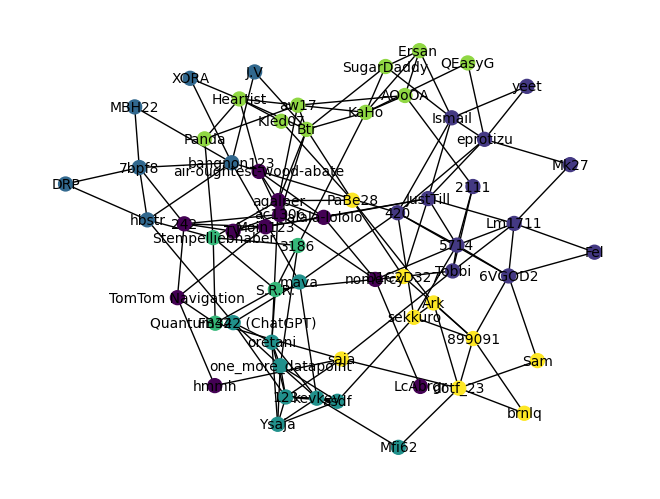

In [548]:
pos = nx.layout.spring_layout(G, k=0.1, seed=1)

best_partition_map = create_partition_map(best_partition)

node_colors = [best_partition_map[n] for n in G.nodes()]
nx.draw(G, with_labels=True, node_color=node_colors,
       pos=pos,font_size=10,node_size=100)

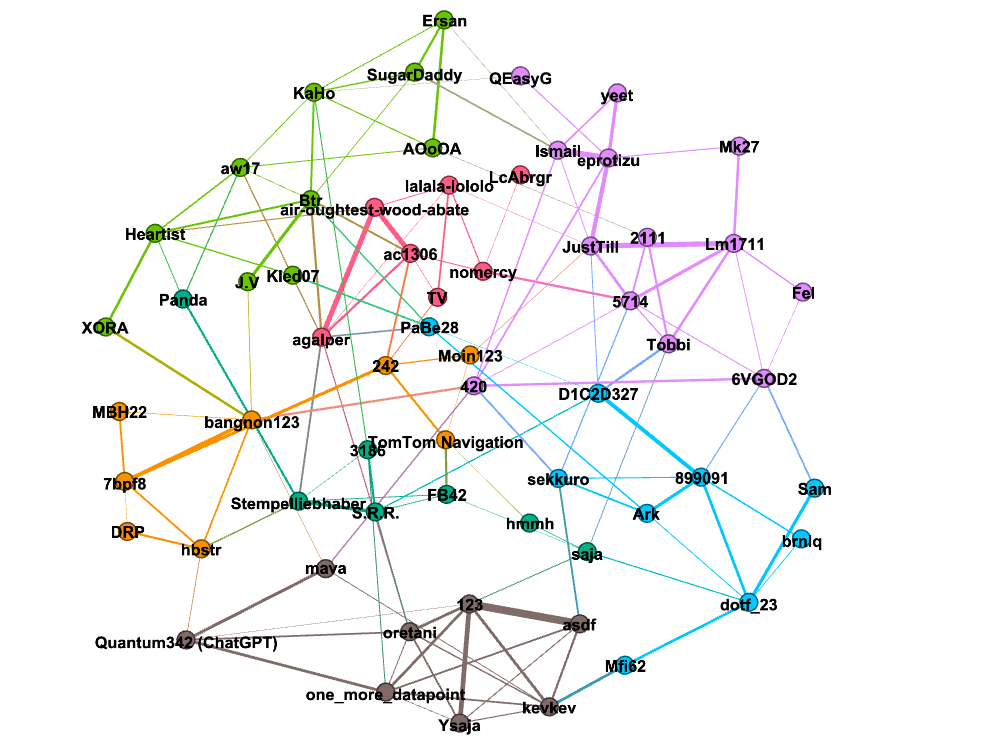

In [549]:
#Gephi Modularität berechnet
from IPython.display import Image

# Path to your image file
image_path = './data/images/modularität_neu.png'

# Display the image
Image(filename=image_path)

In [550]:
nx.write_graphml_lxml(G, "./data/graph.graphml")

## StudentMatcher

Hier alle Werte miteinbeziehen, der Grenzwert ist egal, es werden die 5 höchsten Werte für jeden Teilnehmer gesucht.

In [551]:
sorted_indices = []
for p in range(cosine_sim.shape[0]):
    sorted_indices.append(np.argsort(cosine_sim[p])[::-1])

In [552]:
sorted_indices

[array([ 0, 51, 25,  7, 56, 26, 20, 31, 41, 57, 58, 27,  3, 19,  5, 59, 54,
        55, 46, 13, 50, 28,  2, 40, 49, 47, 35, 44, 32, 36, 29, 42, 12, 38,
        61,  4, 21,  8, 15, 60, 23, 43, 48, 30, 33, 24, 18, 39,  6, 22, 52,
         1, 10, 34, 37,  9, 17, 14, 53, 16, 11, 45]),
 array([ 1, 48, 21, 12, 57,  9, 23, 51, 34,  5, 60,  8,  6, 17,  2, 24, 38,
        37, 53, 42, 15, 41, 11,  3, 45, 43, 35, 36, 31, 16, 10, 50, 55, 30,
        39, 54, 13, 40, 27, 14, 58, 29, 18,  7, 49, 46, 26, 28, 22, 59,  0,
        47, 52, 56, 20, 32, 44, 61, 25, 33, 19,  4]),
 array([ 2, 57, 38, 18, 51, 35, 44, 12, 41, 55, 10, 60,  1, 28, 26, 21, 37,
        27, 29,  7, 40, 52,  0, 36, 50, 43, 30, 20, 23,  5, 16, 42, 17, 45,
         8, 31,  9, 25, 48,  6, 24, 46, 19, 32, 58, 56, 22, 47, 14, 49, 15,
         4, 61, 34, 53, 39, 13, 54, 59,  3, 33, 11]),
 array([ 3, 20,  5, 40, 32, 56, 46, 42, 25, 54, 11, 13, 51, 53,  0, 21, 22,
         7, 24,  8, 58, 33,  1, 34,  4, 28, 59, 61, 57, 36, 41, 15, 30, 12,
  

In [553]:
type(test)
indices_array = np.array(sorted_indices)

In [554]:
fuenf_freunde = []
freundesliste = []

for indices_array in sorted_indices:
    fuenf_freunde.append(indices_array[1:6])
    fuenf_freunde_array = np.array(fuenf_freunde)
    
for row in range(fuenf_freunde_array.shape[0]): 
    for element in fuenf_freunde_array[row]:
        freundesliste.append([data.iloc[row].Pseudonym,data.iloc[element].Pseudonym])

In [555]:
freundesliste

[['lalala-lololo', 'TV'],
 ['lalala-lololo', 'nomercy'],
 ['lalala-lololo', 'air-oughtest-wood-abate'],
 ['lalala-lololo', 'JustTill'],
 ['lalala-lololo', 'agalper'],
 ['hbstr', 'DRP'],
 ['hbstr', '7bpf8'],
 ['hbstr', 'bangnon123'],
 ['hbstr', 'Stempelliebhaber'],
 ['hbstr', 'Quantum342 (ChatGPT)'],
 ['Panda', 'Stempelliebhaber'],
 ['Panda', 'aw17'],
 ['Panda', 'Heartist'],
 ['Panda', 'TV'],
 ['Panda', 'KaHo'],
 ['TomTom Navigation', 'FB42'],
 ['TomTom Navigation', '242'],
 ['TomTom Navigation', 'hmmh'],
 ['TomTom Navigation', 'Moin123'],
 ['TomTom Navigation', 'JustTill'],
 ['LcAbrgr', 'nomercy'],
 ['LcAbrgr', 'D1C2D327'],
 ['LcAbrgr', 'ac1306'],
 ['LcAbrgr', 'JustTill'],
 ['LcAbrgr', 'PaBe28'],
 ['242', '7bpf8'],
 ['242', 'TomTom Navigation'],
 ['242', 'ac1306'],
 ['242', 'Moin123'],
 ['242', 'TV'],
 ['3186', 'S.R.R.'],
 ['3186', 'KaHo'],
 ['3186', 'one_more_datapoint'],
 ['3186', 'Stempelliebhaber'],
 ['3186', 'SugarDaddy'],
 ['air-oughtest-wood-abate', 'agalper'],
 ['air-oughtest-w

In [556]:
#DataFrame erstellen, mit der Liste der Pseudonymen und ihren zugeordneten Freunden
data_freunde = pd.DataFrame(freundesliste, columns=["Name", "Freunde"])

print(data_freunde)

              Name                  Freunde
0    lalala-lololo                       TV
1    lalala-lololo                  nomercy
2    lalala-lololo  air-oughtest-wood-abate
3    lalala-lololo                 JustTill
4    lalala-lololo                  agalper
..             ...                      ...
305       D1C2D327                   899091
306       D1C2D327                    Tobbi
307       D1C2D327                   S.R.R.
308       D1C2D327                 JustTill
309       D1C2D327                   PaBe28

[310 rows x 2 columns]


In [557]:
data_freunde.to_csv("./data/data_freunde.csv", sep=',')

In [558]:
filename = "./data/data_freunde.csv"

data = pd.read_csv(filename)

In [559]:
data

,Unnamed: 0,Name,Freunde
0,0,lalala-lololo,TV
1,1,lalala-lololo,nomercy
2,2,lalala-lololo,air-oughtest-wood-abate
3,3,lalala-lololo,JustTill
4,4,lalala-lololo,agalper
...,...,...,...
305,305,D1C2D327,899091
306,306,D1C2D327,Tobbi
307,307,D1C2D327,S.R.R.
308,308,D1C2D327,JustTill
